<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW2P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final value of theta = [-1.23275857e+57 -7.44902747e+60 -3.67581987e+57 -1.64032516e+57
 -2.27151447e+57 -1.05213810e+57]


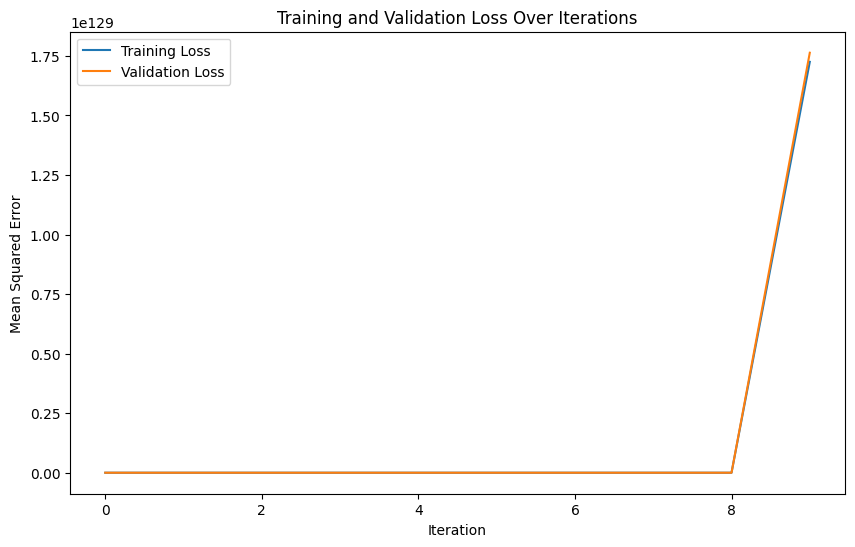

In [ ]:

# Problem 1a

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4th Year Charlotte/IntroToML/Housing.csv'

housing = pd.read_csv(file_path)

np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = housing_train.pop('price')
X_train = housing_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

y_val = housing_test.pop('price')
X_val = housing_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]

m = len(X_train)
num_columns = np.shape(X_train)[1]
theta = np.zeros(num_columns)
theta = np.zeros(6)

n_iterations = 10
alpha = 0.01

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()


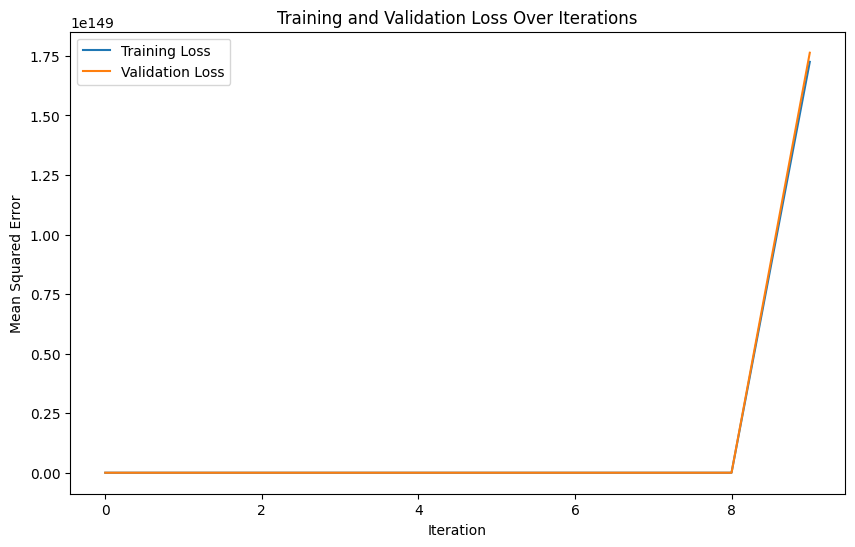

In [ ]:

# Problem 1b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/4th Year Charlotte/IntroToML/Housing.csv'

housing = pd.read_csv(file_path)

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

np.random.seed(0)
housing_train, housing_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = housing_train.pop('price')
X_train = housing_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]

y_val = housing_test.pop('price')
X_val = housing_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']]

m = len(X_train)
num_columns = np.shape(X_train)[1]
theta = np.zeros(num_columns+1)

n_iterations = 10
alpha = 0.1

X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]

train_losses = []
val_losses = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b_train.T.dot(X_b_train.dot(theta) - y_train)
    theta -= alpha * gradients

    train_loss = (1/m) * np.sum(np.square(X_b_train.dot(theta) - y_train))
    val_loss = (1/len(X_val)) * np.sum(np.square(X_b_val.dot(theta) - y_val))

    train_losses.append(train_loss)
    val_losses.append(val_loss)

# Plot the training and validation loss after each iteration
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()
